# 1. Prepare the environment

In [4]:
import numpy as np
import pandas as pd

from Label_Bot.label_bot import utils, models

## 1.1. Load the test dataset 

In [5]:
mode = 'test'

In [6]:
df = pd.read_pickle(f'{mode}_90k.pkl')
df = utils.make_st_compatible(df)

y_true = np.array(list(map(list, df.labels)))

<hr></hr>

# 2. Evaluation

## 2.1. Evaluate the fine-tuned model

In [4]:
bot = models.Bot(use_head=False, model_path='models/classification/roberta-base')

In [ ]:
model_outputs = bot.predict(df['title'], df['body'])

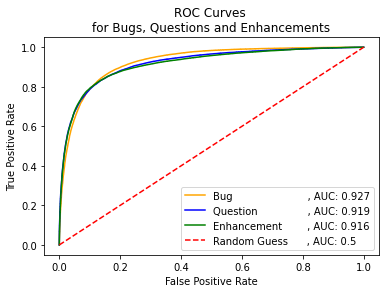

,Accuracy,ROC-AUC,Precision,Recall,F1
Bug,0.860310,0.927087,0.824825,0.759784,0.790970
Question,0.862635,0.919344,0.804389,0.777622,0.790779
Enhancement,0.863977,0.915618,0.820508,0.779187,0.799314


In [6]:
metrics_df, exact_accuracy, lrap_score = utils.get_model_stats(y_true, model_outputs)
metrics_df

In [7]:
stats_df = pd.DataFrame([exact_accuracy, lrap_score]).T
stats_df.columns = ['Exact Match Accuracy', 'LRAP']
stats_df.index = ['value']
stats_df

,Exact Match Accuracy,LRAP
value,0.765078,0.895237


## 2.2. Evaluate the fine-tuned classifier with scores' head

We can see that, as expected, the head made the model more prone to giving extra labels without hurting its performance. More specifically, the addition of the custom head leads to higher overall recall while maintaining similar F1 scores and comparable accuracies. 

**What it basically comes down to is if you prefer to favor recall or precession.**

In [7]:
bot = models.Bot(use_head=True, model_path='models/classification/roberta-base')

In [ ]:
model_outputs = bot.predict(df['title'], df['body'])

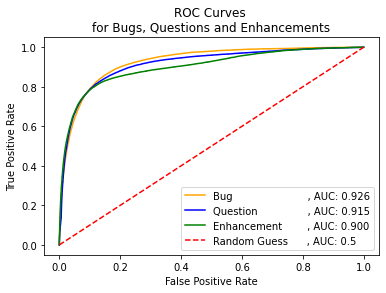

,Accuracy,ROC-AUC,Precision,Recall,F1
Bug,0.854462,0.925950,0.758506,0.853280,0.803106
Question,0.863162,0.914695,0.828793,0.743736,0.783964
Enhancement,0.838704,0.900350,0.736158,0.835476,0.782679


In [9]:
metrics_df, exact_accuracy, lrap_score = utils.get_model_stats(y_true, model_outputs)
metrics_df

In [10]:
stats_df = pd.DataFrame([exact_accuracy, lrap_score]).T
stats_df.columns = ['Exact Match Accuracy', 'LRAP']
stats_df.index = ['value']
stats_df

,Exact Match Accuracy,LRAP
value,0.723376,0.891758
